## Task.5 Sales Prediction

### 1. Getting Data Ready

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

#Exporting the data
price = pd.read_csv('Advertising.csv')

In [2]:
price

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
price.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
price.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
price.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
#Finding the number of duplicates
print('number of duplicates', len(price[price.duplicated()]))

number of duplicates 0


<AxesSubplot:>

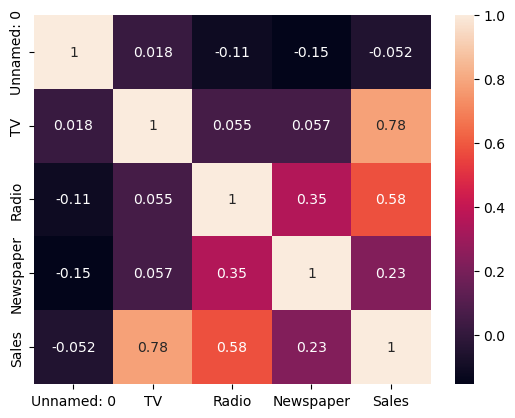

In [7]:
#Heatmap
sns.heatmap(price.corr(), annot = True)

<AxesSubplot:xlabel='TV', ylabel='Count'>

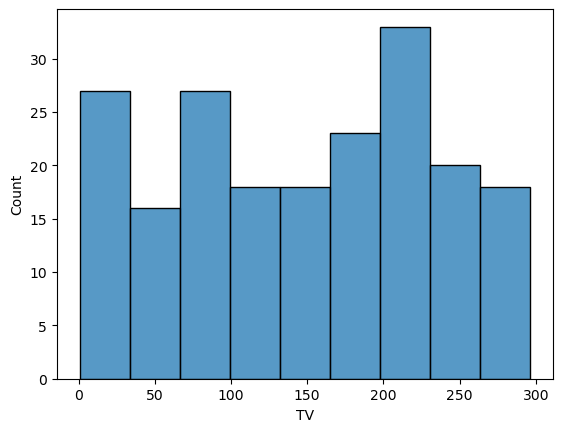

In [8]:
#Histogram
sns.histplot(data=price, x='TV')

<AxesSubplot:xlabel='Radio', ylabel='Count'>

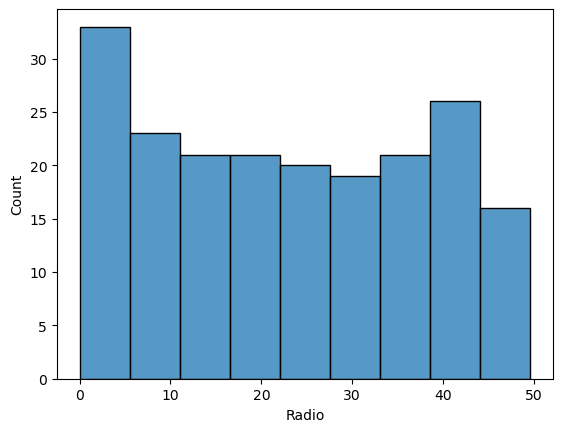

In [9]:
sns.histplot(data=price, x='Radio')

<AxesSubplot:xlabel='Newspaper', ylabel='Count'>

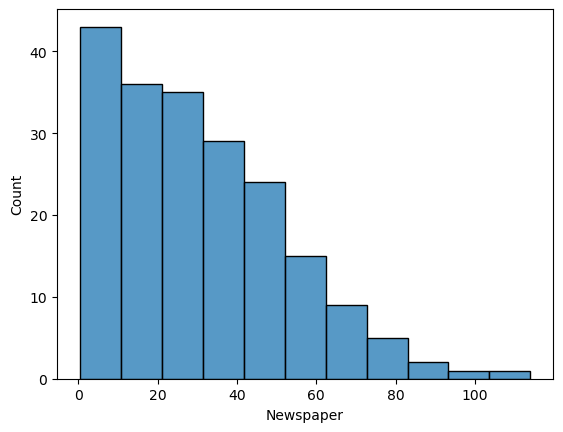

In [10]:
sns.histplot(data=price, x='Newspaper')

### 2. Dividing the data into Training and Testing Sets

In [11]:
from sklearn.model_selection import train_test_split

x = price[['TV']]
y = price['Sales']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

### 3. Choosing Linear Regression Machine Learning Model

In [12]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()

### 4. Fitting the model to Training Data and Evaluating

In [13]:
clf.fit(x_train, y_train)

LinearRegression()

In [14]:
print(clf.coef_)

[0.04590358]


In [15]:
print(clf.intercept_)

7.169406404970454


In [16]:
y_preds = clf.predict(x_test)

In [17]:
act_predict = pd.DataFrame({
    'Actual': y_test.values.flatten(),
    'Predicted': y_preds.flatten()
})

In [18]:
act_predict.head(15)

,Actual,Predicted
0,18.4,16.841291
1,7.2,7.568768
2,18.0,17.194749
3,25.5,20.187663
4,22.6,17.102942
5,14.6,13.931004
6,14.9,15.817641
7,23.7,16.299629
8,22.3,17.121303
9,9.3,7.958948


<AxesSubplot:ylabel='Frequency'>

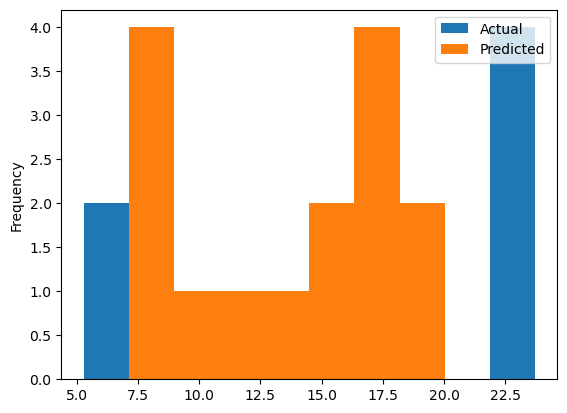

In [19]:
act_predict.sample(15).plot(kind='hist')